# seaborn

    -Matlpotlib 시각화 차트를 쉽게 그릴 수 있도록 도와주는 라이브러리

In [8]:
import seaborn as sns

- Relational plots
> 두 변수의 관계를 볼 때
- Distribution plots
> 변수의 데이터 분포 볼 때
- Categorical plots
> 범주형 변수의 집계나 볌주형 변수와 수치형 변수간의 관계를 볼 때 

In [9]:
tips = sns.load_dataset("tips")

In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### scatterplot

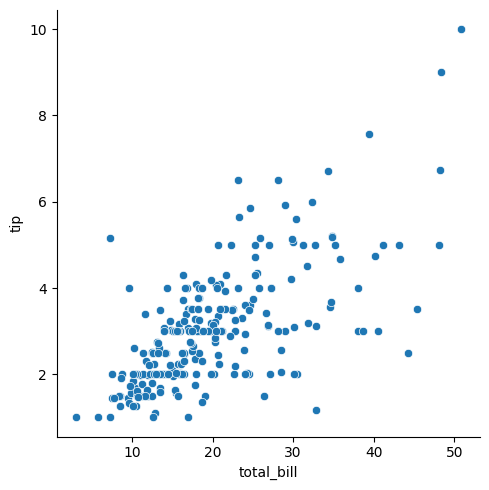

In [12]:
sns.relplot(data = tips, x="total_bill", y="tip", kind="scatter")

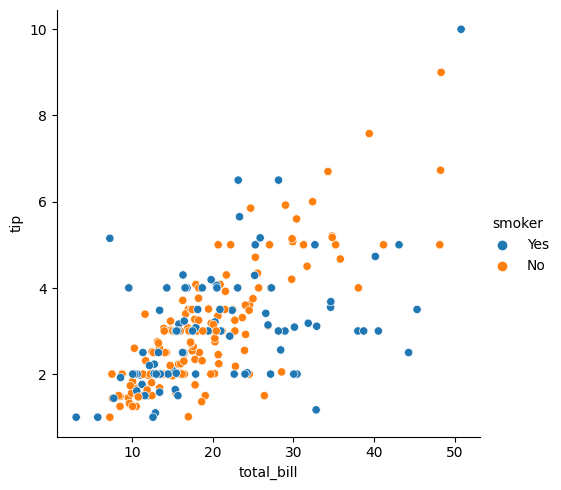

In [13]:
sns.relplot(data = tips, x="total_bill", y = "tip", kind="scatter", hue="smoker")

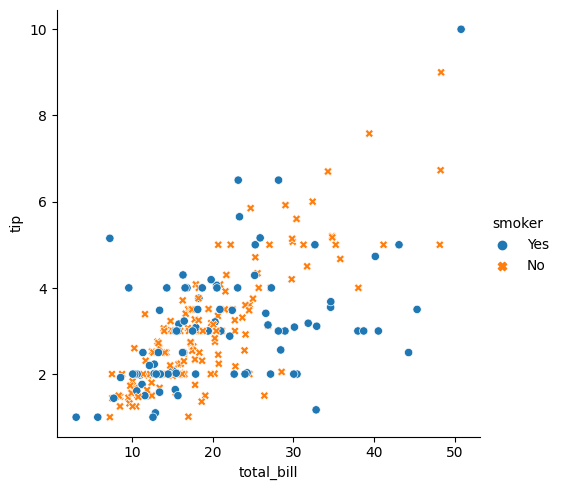

In [14]:
sns.relplot(data=tips, x="total_bill", y="tip",kind="scatter", hue="smoker",style="smoker")

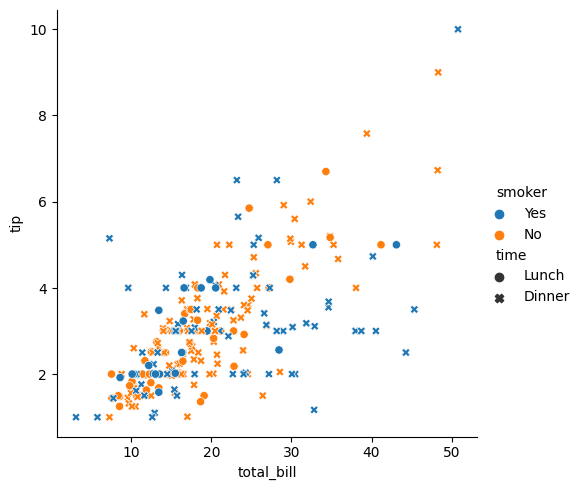

In [15]:
sns.relplot(data =tips, x="total_bill", y="tip", hue="smoker", style="time")

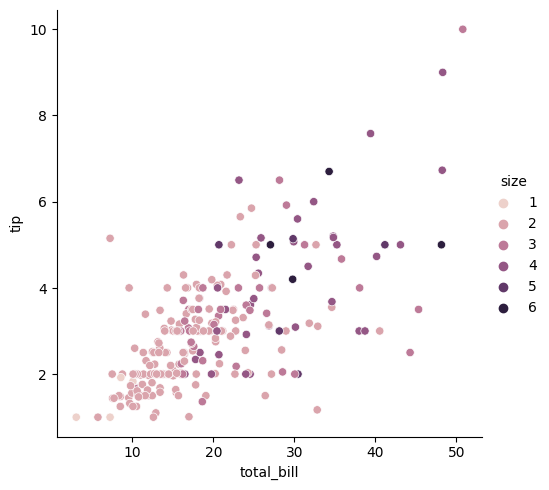

In [16]:
sns.relplot(data =tips, x="total_bill",y="tip", hue="size")

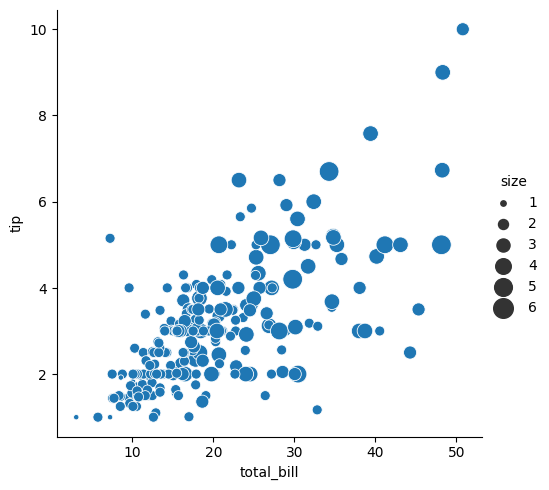

In [17]:
sns.relplot(data=tips, x="total_bill",y="tip", size= "size", sizes=(15,200))

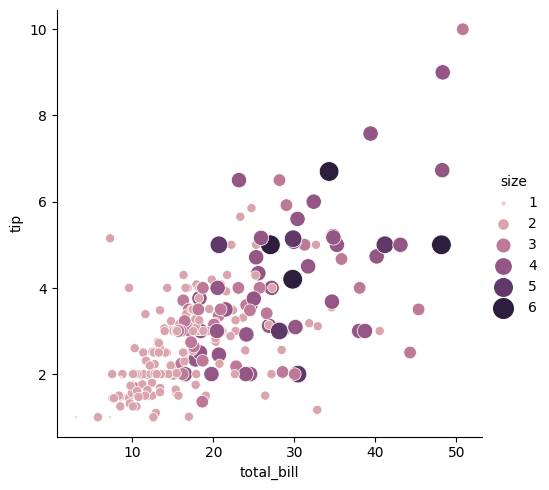

In [18]:
sns.relplot(data =tips , x="total_bill", y="tip", hue="size",size = "size", sizes=(5,200))

### lineplot

    -시간의 흐름에 따른 관측값의 변화, 추세를 시각화하는데 유용한 선 그래프

In [19]:
fmri = sns.load_dataset("fmri")

fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [20]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


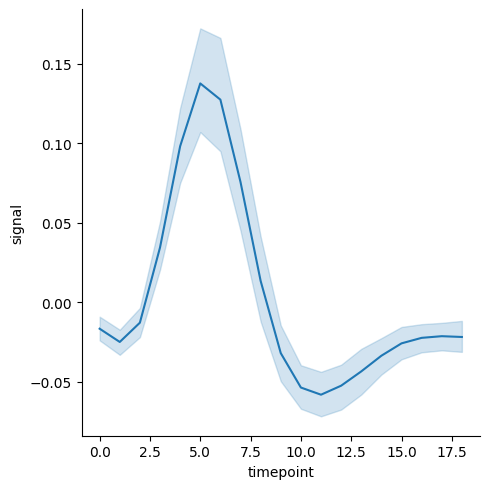

In [21]:
sns.relplot(data =fmri, x= "timepoint", y="signal", kind="line")

### seaborn의 기본 동작은 
> x 평균과 평균 주위의 95% 신뢰 구간을 플로팅 하여 각 값에서 여러 측정값을 집계한다.
> 집계 작업을 끄려면 estimator =None 으로 설정하면 된다

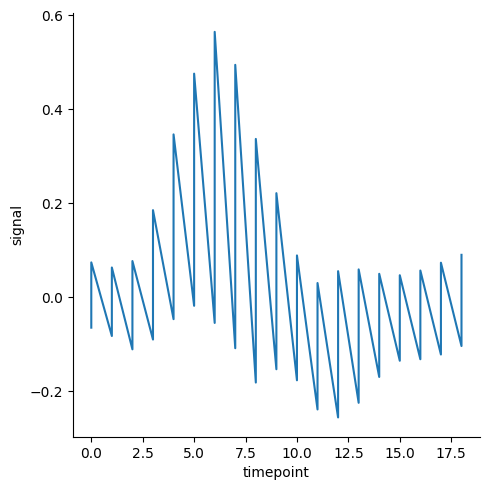

In [22]:
sns.relplot(data = fmri, kind = "line", x="timepoint", y="signal", estimator = None)

#float일때는 산점도 

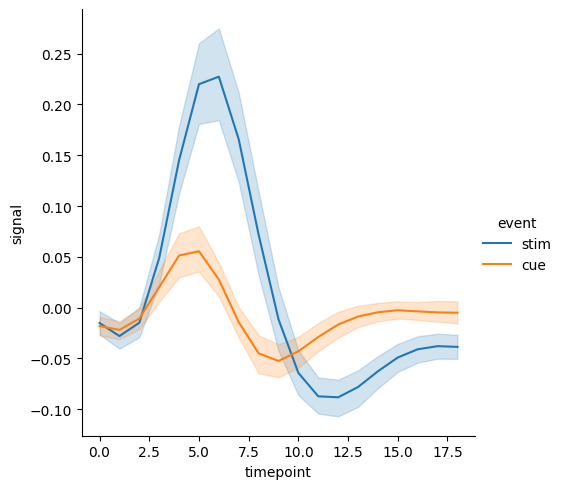

In [23]:
sns.relplot(data = fmri, kind="line", x="timepoint", y="signal", hue="event")

### hue를 이용하여 하위 집합 분석

> 카테고리 데이터를 hue(색상으로 다르게 포현)을 이용하여 하위 집합으로 분석

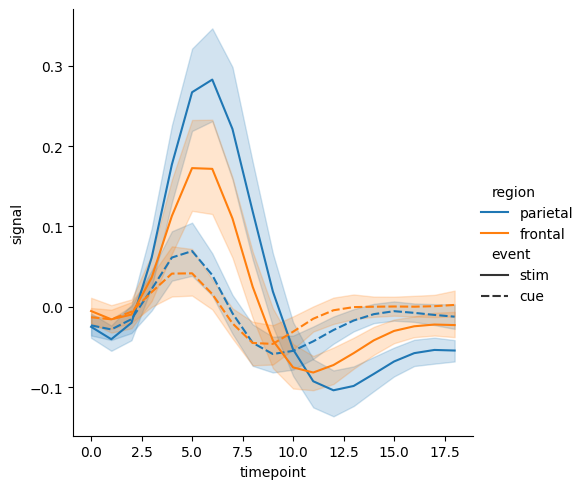

In [24]:
sns.relplot(data =fmri, x="timepoint", y="signal",
            kind= "line", hue="region",style="event")

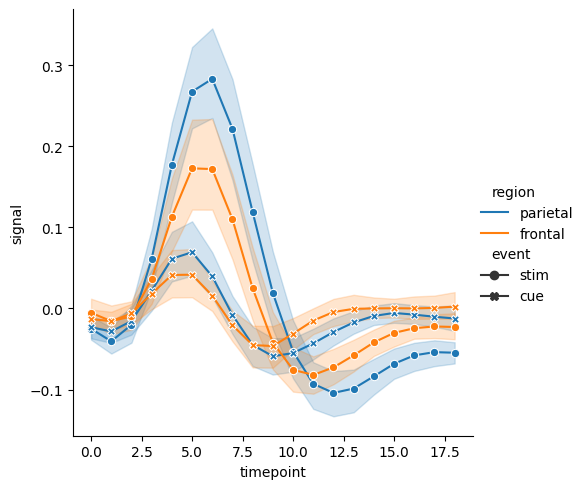

In [25]:
sns.relplot(data= fmri, kind = "line", x="timepoint", y="signal",
            hue="region", style="event", dashes=False, markers=True)

### 여러 관계 그래프

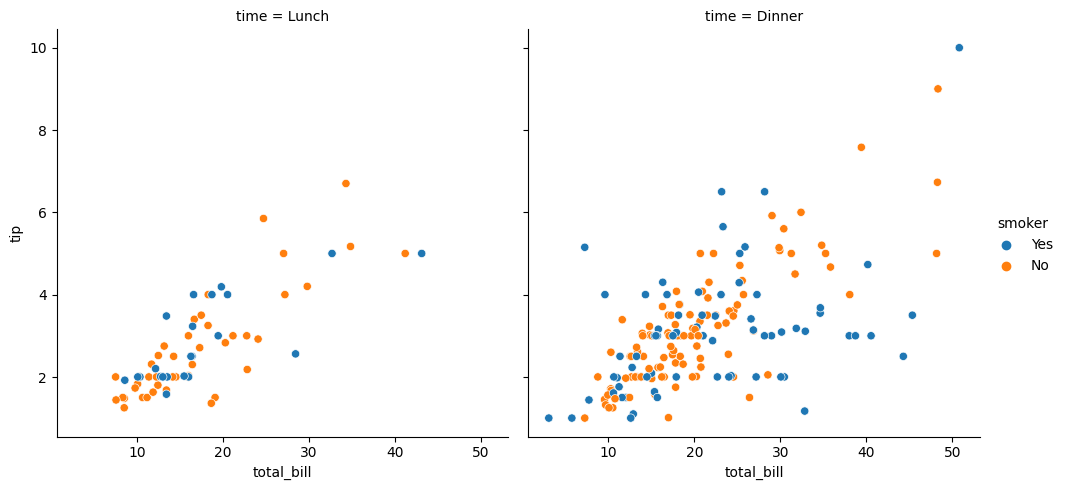

In [26]:
sns.relplot(data= tips, x="total_bill", y="tip", hue="smoker", col="time")

#col: 오른쪽에 그래프를 추가한다

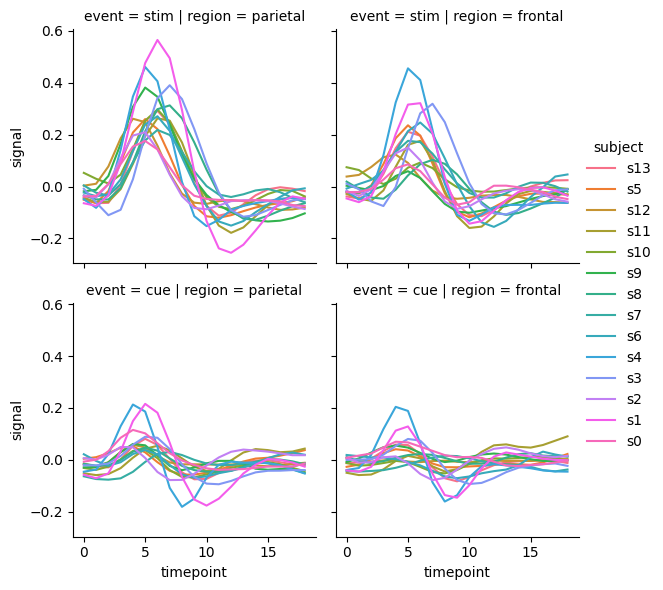

In [27]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3, # col, row 사용
    estimator=None
)

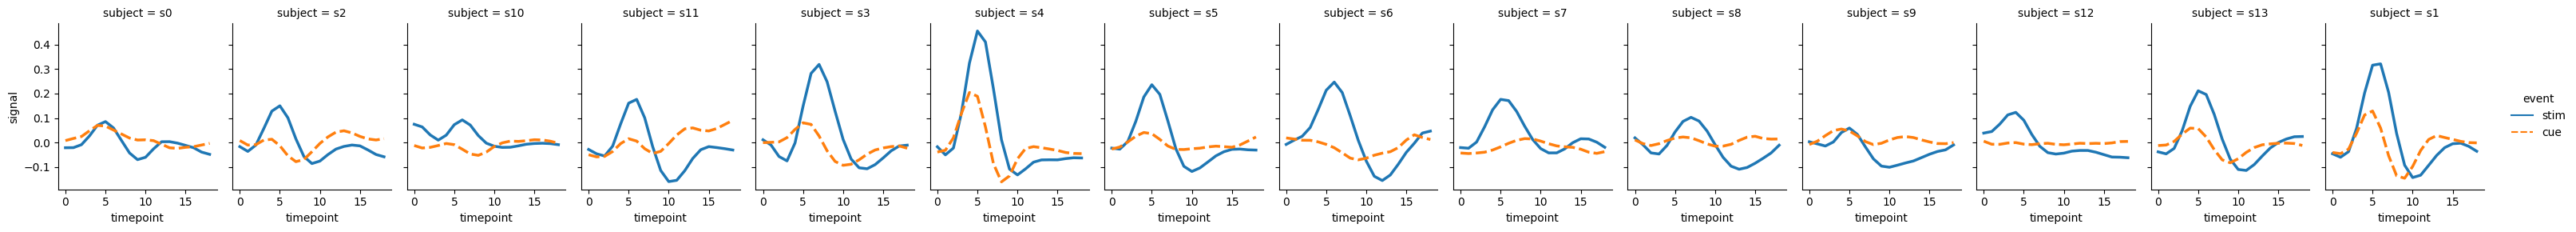

In [28]:
sns.relplot(data = fmri.query("region=='frontal'"), kind="line",
            x="timepoint", y="signal", hue="event",style="event", col="subject",
            height=3, aspect=.75, linewidth=2.5)

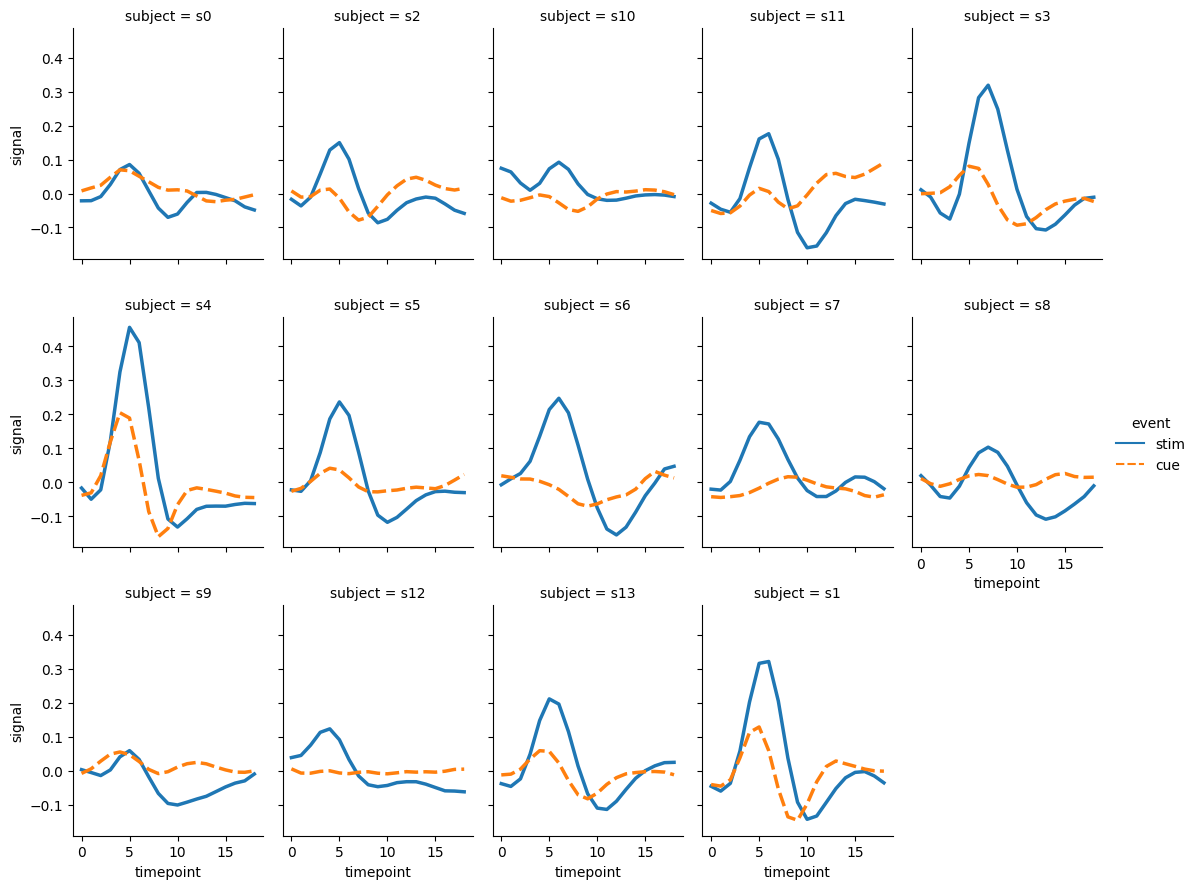

In [29]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5, # col_wrap: 5개 단위로 줄 바꿈
    height=3, aspect=.75, linewidth=2.5,
)

### Distribution plots

In [30]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [31]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


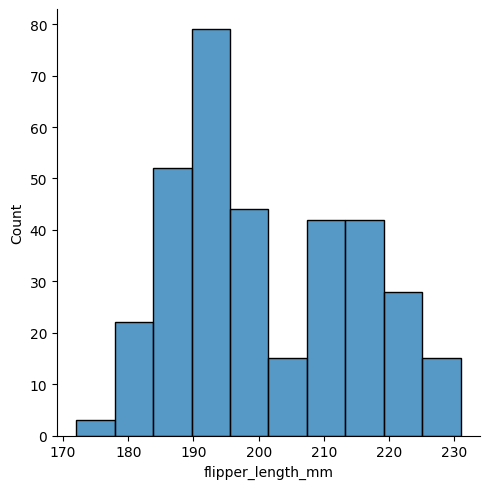

In [32]:
sns.displot(penguins, x= "flipper_length_mm")

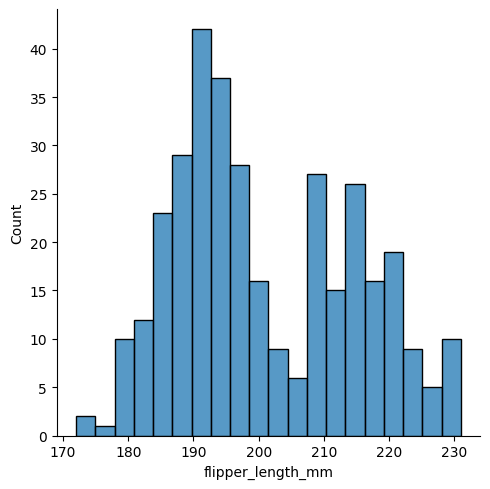

In [33]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

### hue를 이용하여 추가 분석

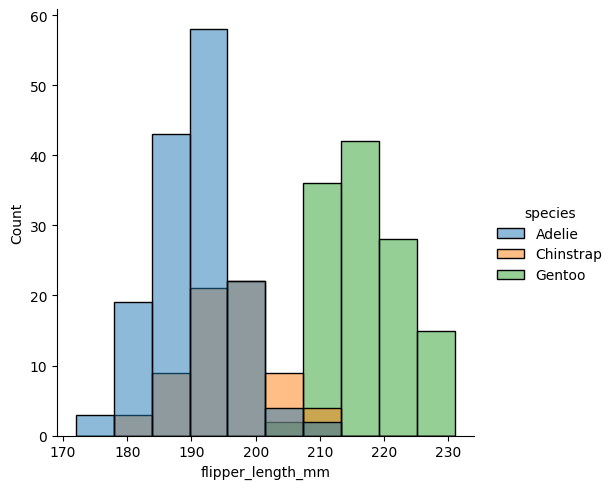

In [34]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

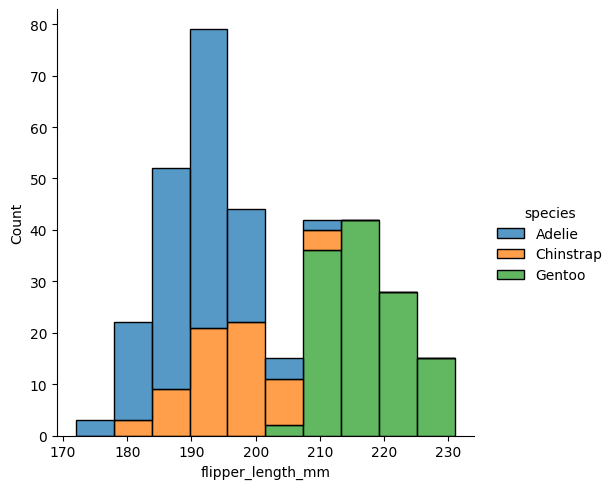

In [35]:
#여러 데이터 겹쳐서 보기 힘들면 multiple 함수를 사용하면 쉽다
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

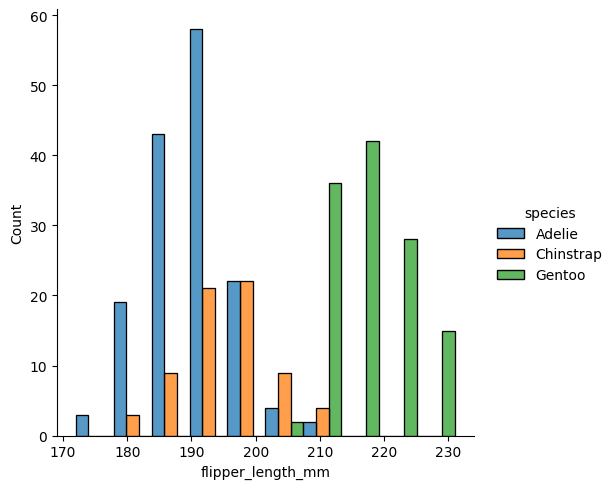

In [36]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge")

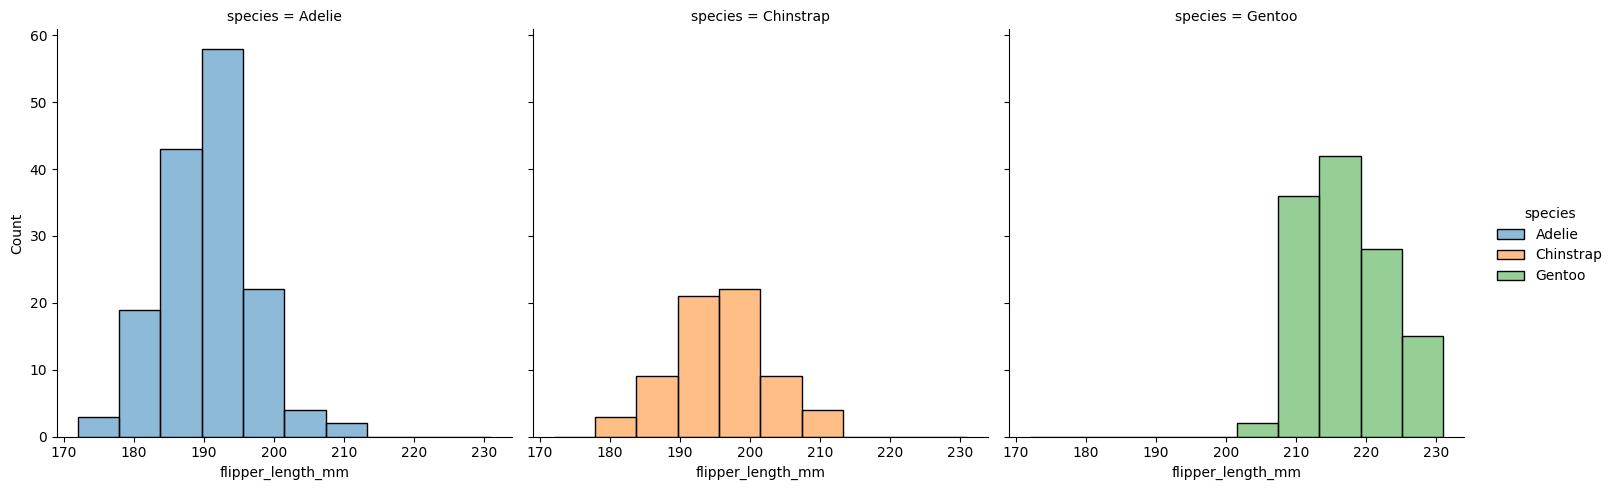

In [37]:
sns.displot(penguins, x="flipper_length_mm", col="species", hue = "species")

### stat을 이용한 정규화

> 하위 집합의 관측 수가 같지 않은 경우 개수 측면에서 분포를 비교하는 것이 이상적이지 않을 수 있다. 이런 경우 해결팩으로 매개변수를 사용하여 카운트를 정규화 하는 것이다

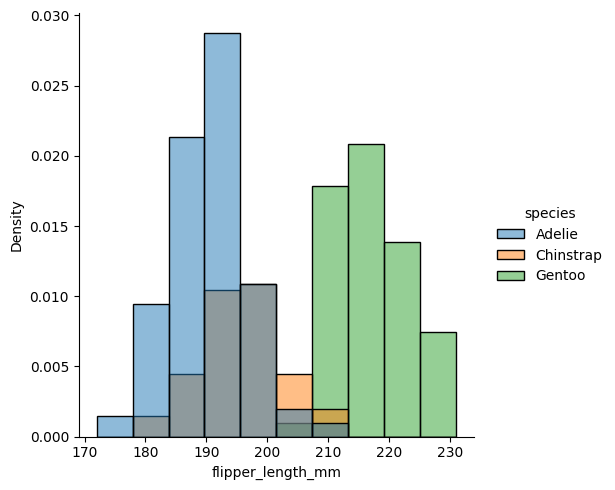

In [38]:
# density는 영역의 합이 1이 되도록 막대의 크기를 조정한다

sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

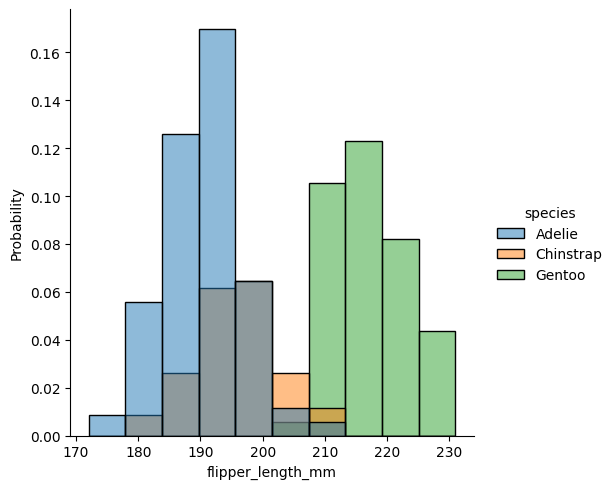

In [39]:
# probability는 높이의 합이 1이 되도록 정규화를 한다 
# 변수가 이산형일때 가장 좋은 방식

sns.displot(penguins, x="flipper_length_mm", hue="species", stat= "probability")

### kdeplot(커널 밀도 측정)

    -현재 보유한 Data를 기반으로 어느정도 추측을 하여 부드러운 곡선의 분포를 그려낼 수 있다. 
    - 가우시안 커널로 관찰을 평활하하여 연속 밀도 추정치를 생성합니다.



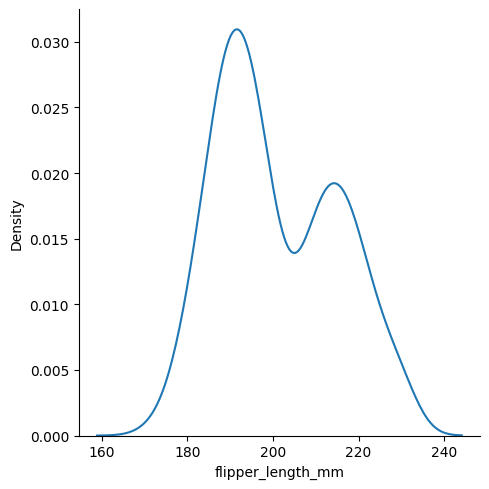

In [40]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

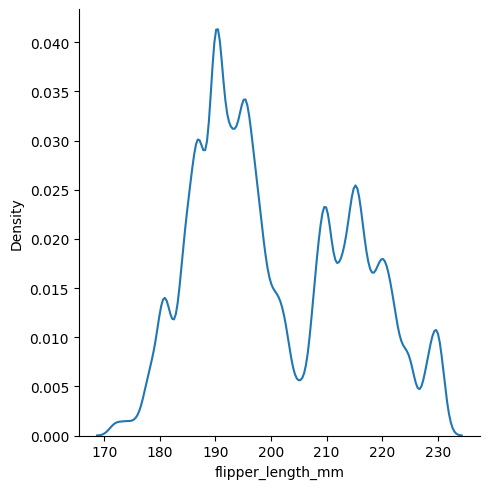

In [41]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)
#bw_adjust bins와 비슷한 역활을 한다

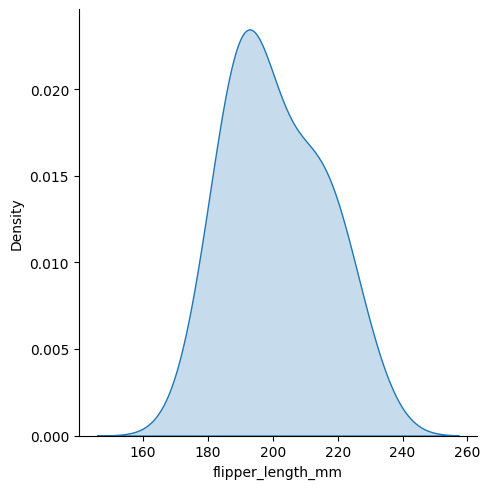

In [42]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2, fill=True)

### hue를 이용한 추가 분석

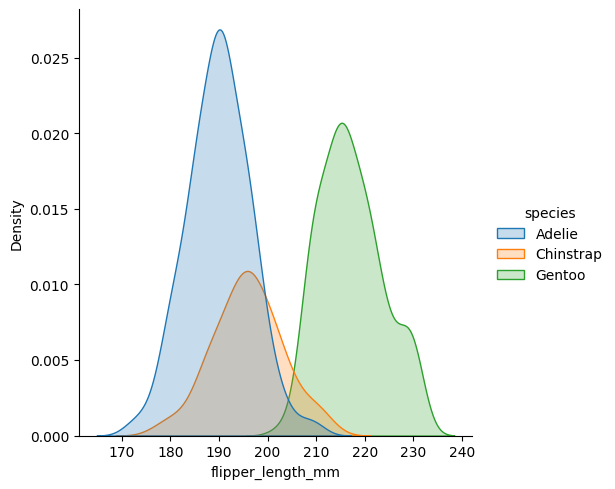

In [43]:
sns.displot(penguins, x="flipper_length_mm", hue = "species", kind= "kde", fill=True)

#fill은 kdeplot 그래프의 안을 채워서 보여준다

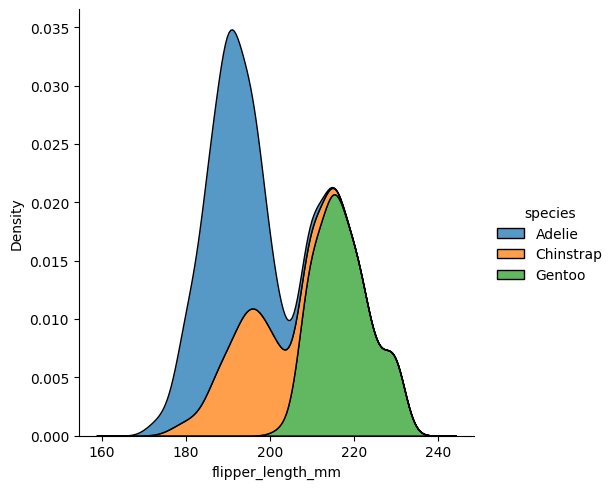

In [44]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack" )

### kde 주의점

    - 데이터가 매끄럽지 않은 경우에도 kde는 항상 부드럽게 곡선을 표시하기 때문에 데이터의 의미가 외곡될 가능성이 있다

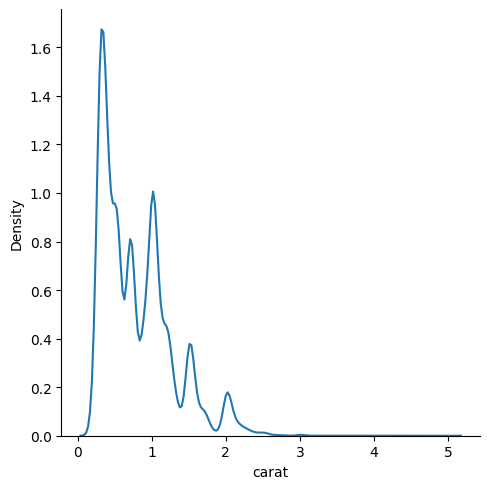

In [45]:
diamonds =sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

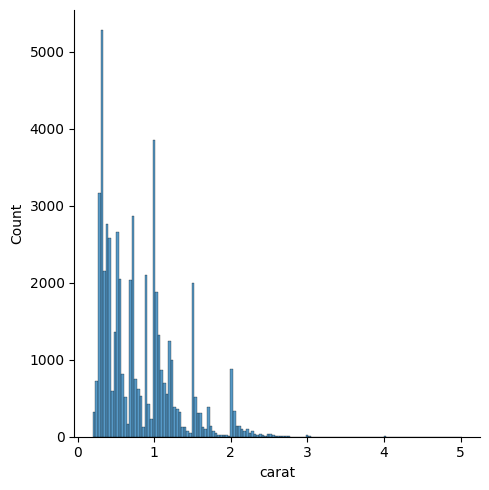

In [46]:
sns.displot(diamonds, x="carat")

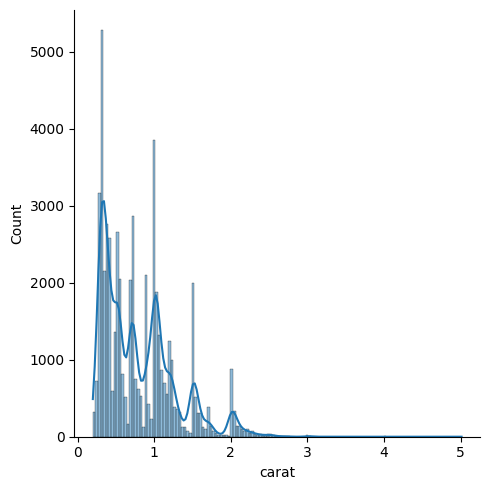

In [47]:
sns.displot(diamonds, x="carat", kde=True)

### ecdfplot

    -경험적 누적분포함수(empirical cumulative distribution function, ECDF)는 n개의 데이터 포인트 각각에서 1/n 씩 점프하는 계단 함수이다

    -고려해야할 빈 크기나 스무딩 매개변수가 없으며, 곡선이 단조롭게 증가하기 때문에 여러 분포를 비교하는 데 적합하다

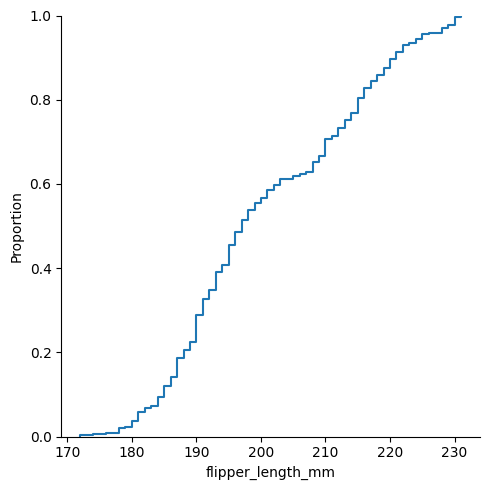

In [48]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

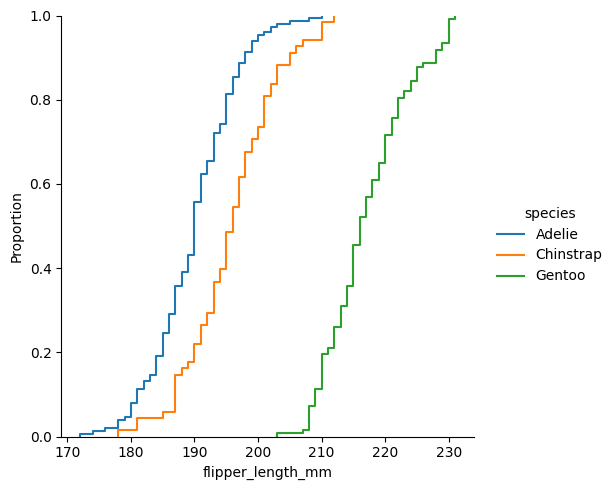

In [49]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

### rugplot

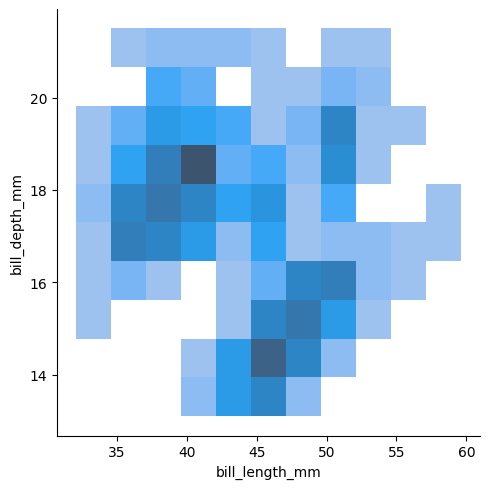

In [50]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

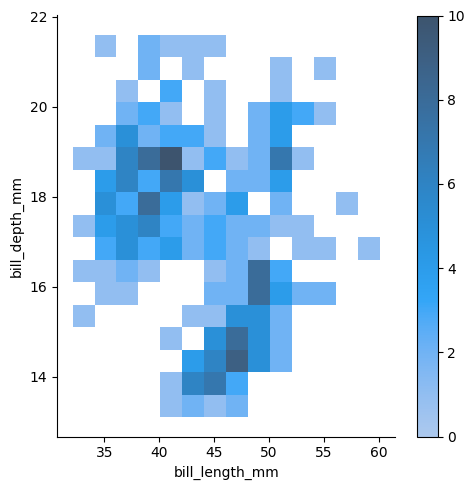

In [51]:
sns.displot(penguins,x="bill_length_mm", y="bill_depth_mm", binwidth=(2,.5), cbar=True)

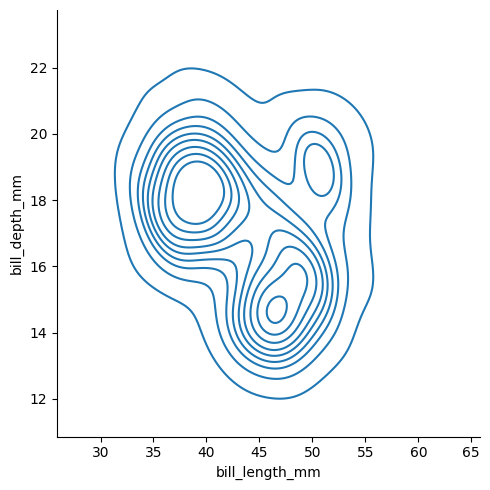

In [52]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

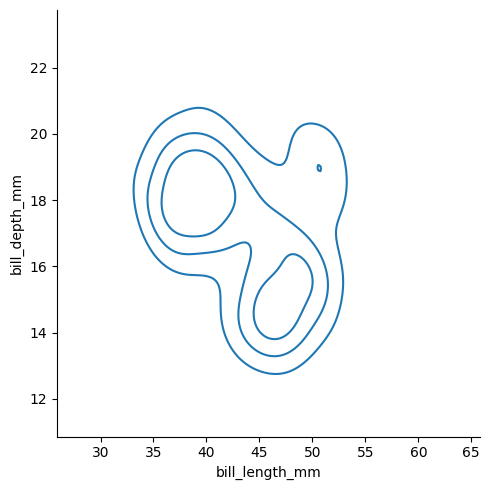

In [53]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh= .2,levels=4)
# 4개의 레벨로 표현
#등호선이 줄어들것을 볼 수 있다

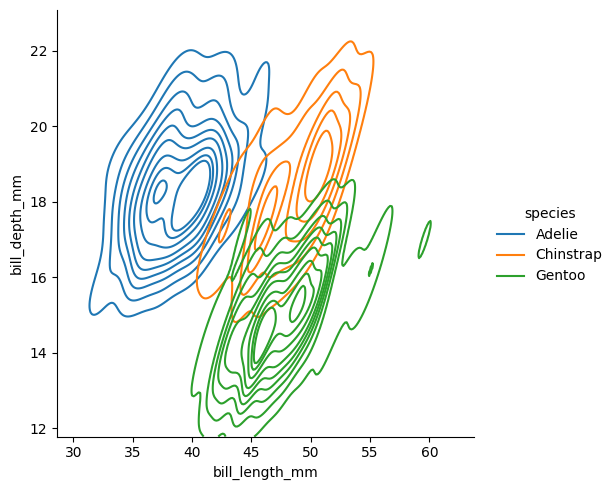

In [54]:
sns.displot(penguins, x= "bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

### 다른 설정에서 분포 시각화

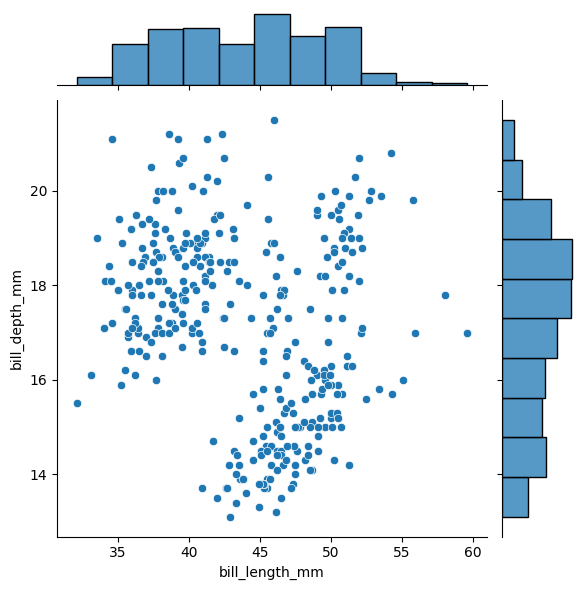

In [55]:
sns.jointplot(data=penguins,x="bill_length_mm", y="bill_depth_mm")

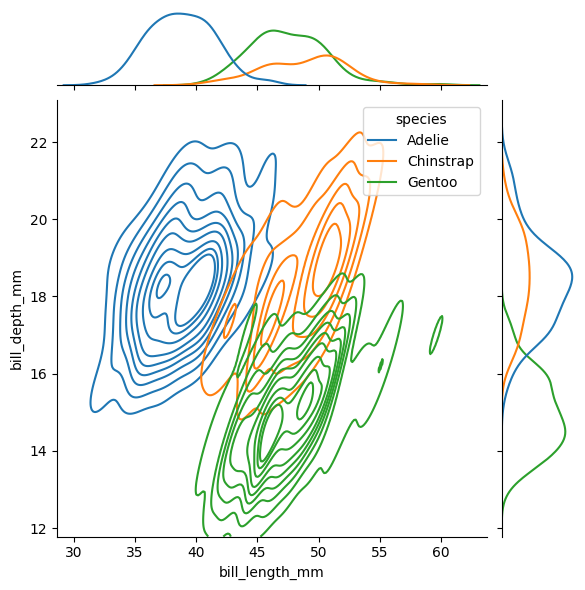

In [56]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species",
              kind="kde")

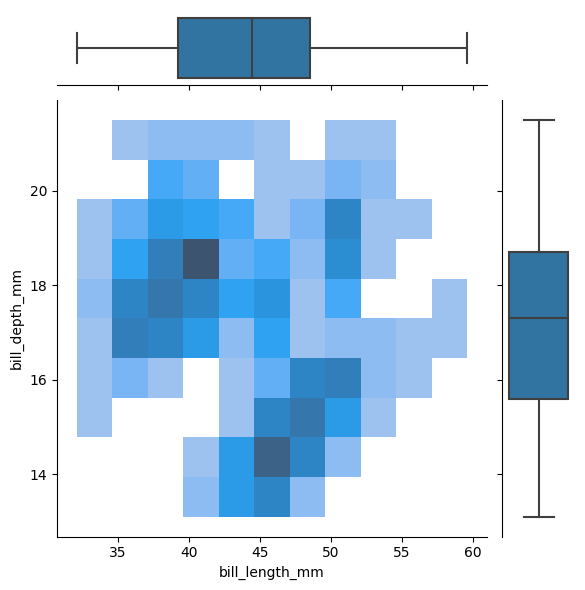

In [57]:
g = sns.JointGrid(data = penguins,x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

### 많은 분포 그리기

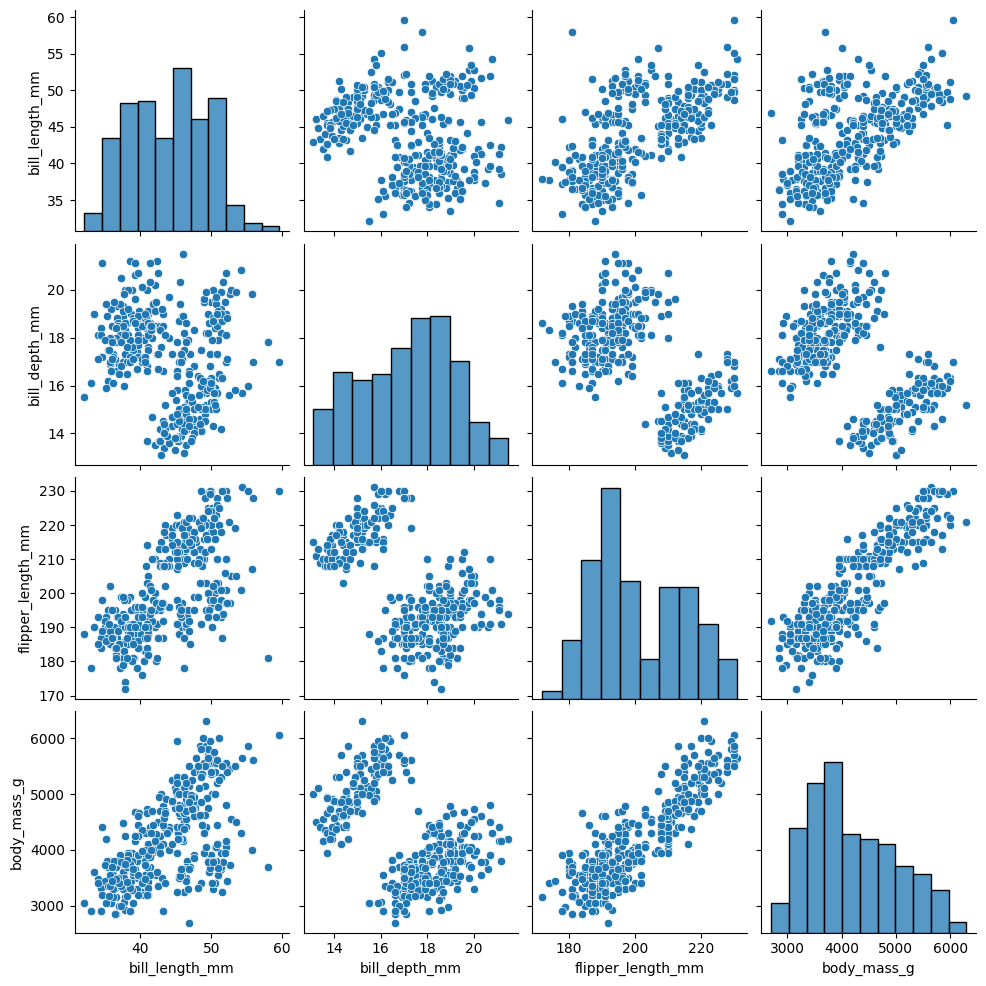

In [58]:
sns.pairplot(penguins)

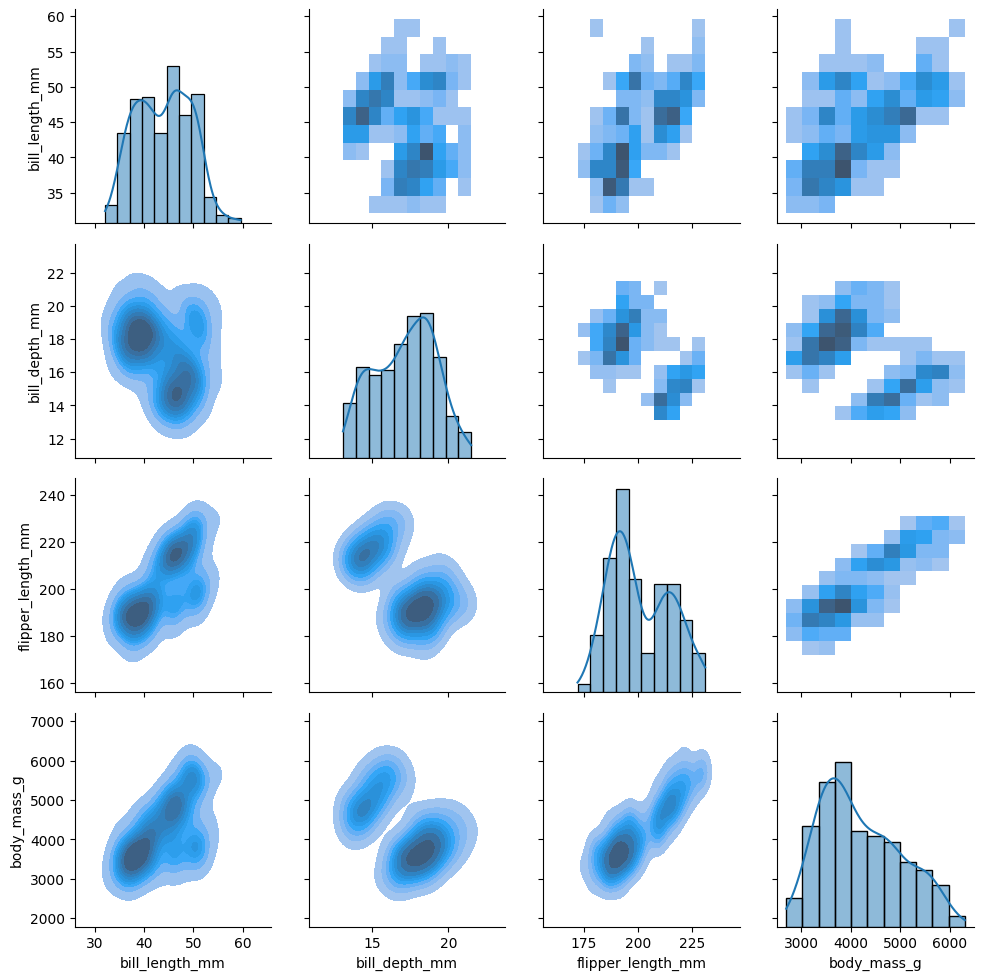

In [59]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill =True)
g.map_diag(sns.histplot, kde=True)

# Categorical plots

### 범주형 산점도

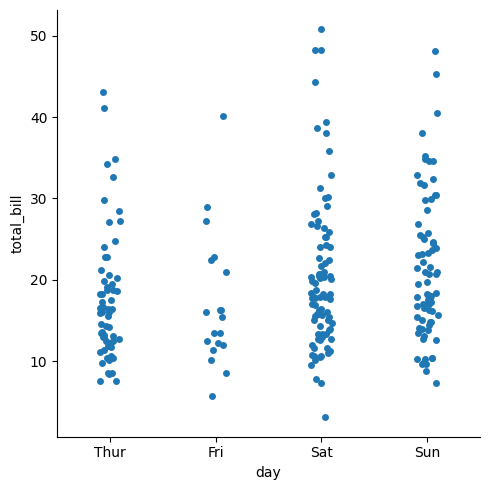

In [60]:
tips = sns.load_dataset("tips")
sns.catplot(data = tips, x="day", y="total_bill")
#데이터가 많이 겹쳐있으면 정확한 분석이 어렵다

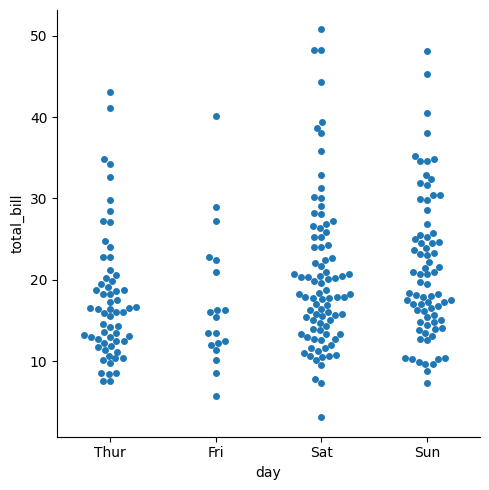

In [61]:
sns.catplot(data = tips, x="day", y="total_bill", kind="swarm")

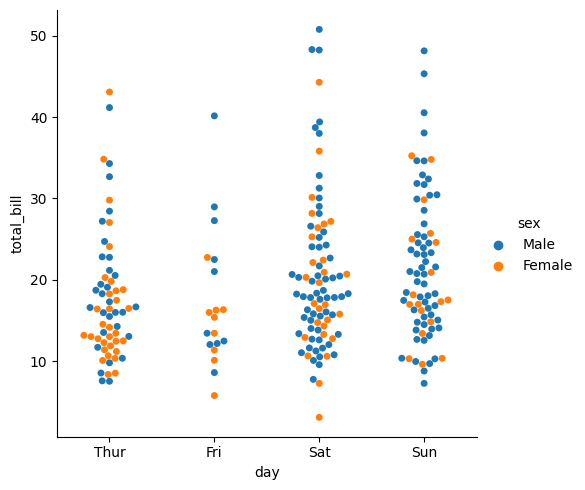

In [62]:
sns.catplot(data= tips, x="day", y="total_bill", hue="sex", kind="swarm")

### 박스 플롯

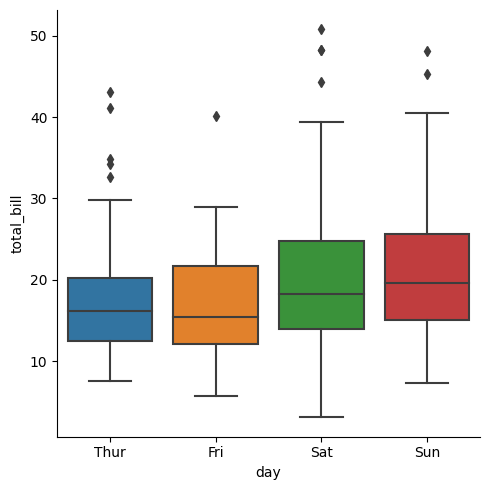

In [63]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

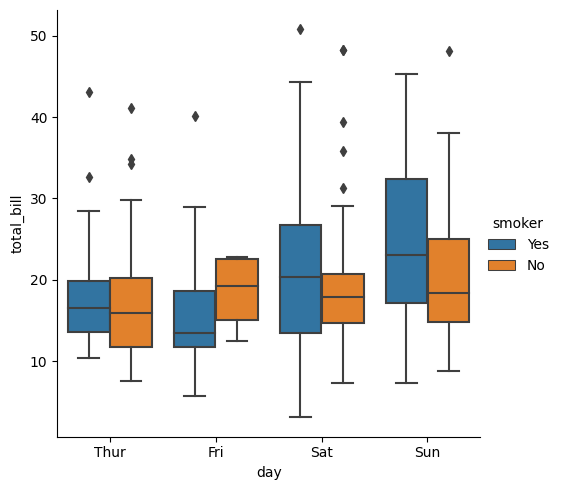

In [64]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

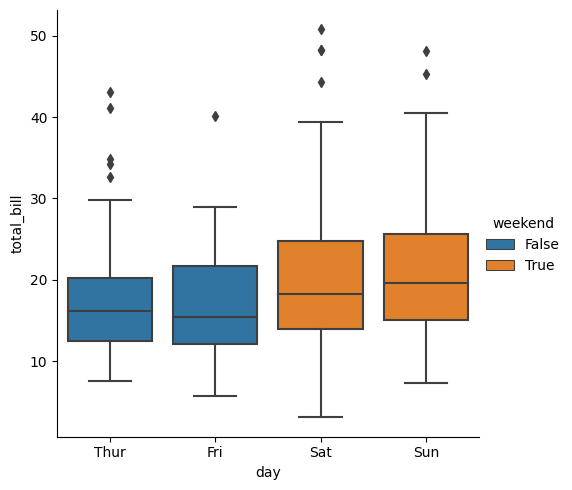

In [65]:
tips["weekend"] = tips["day"].isin(["Sat","Sun"])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False)

### 바이올린 플롯

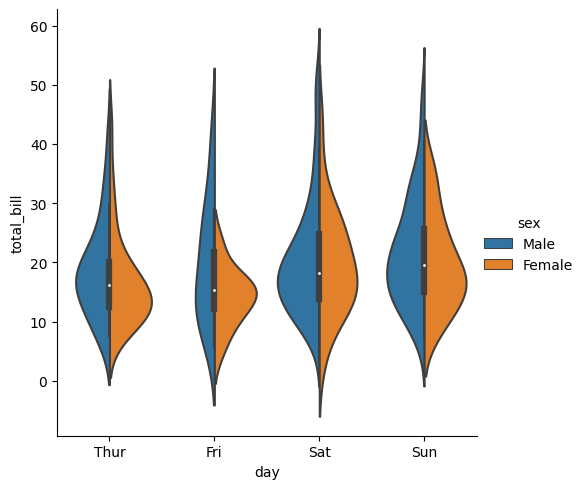

In [66]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="violin",
            split=True)

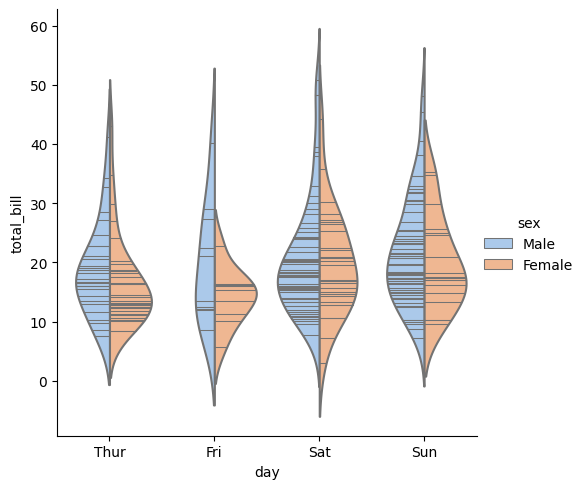

In [67]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="violin", inner="stick", split=True, palette= "pastel")

# 중심 경향 추정

### 막대 그래프

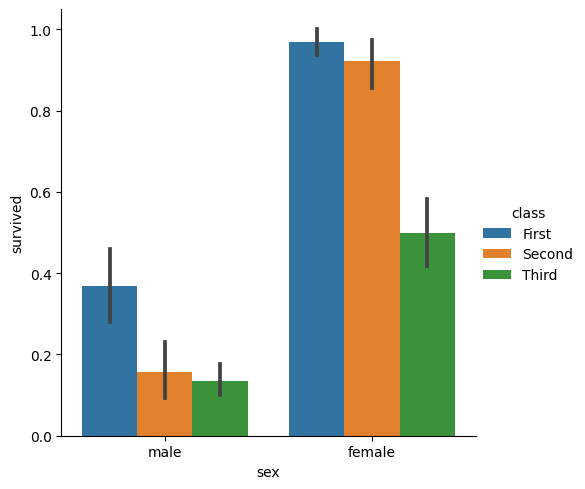

In [68]:
titanic = sns.load_dataset("titanic")
sns.catplot(data = titanic, x="sex", y="survived", hue="class", kind="bar")

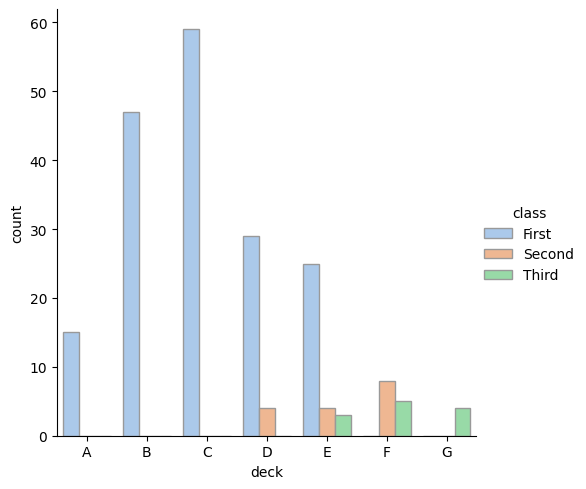

In [69]:
sns.catplot(
    data=titanic, x="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

### 포인트 플롯

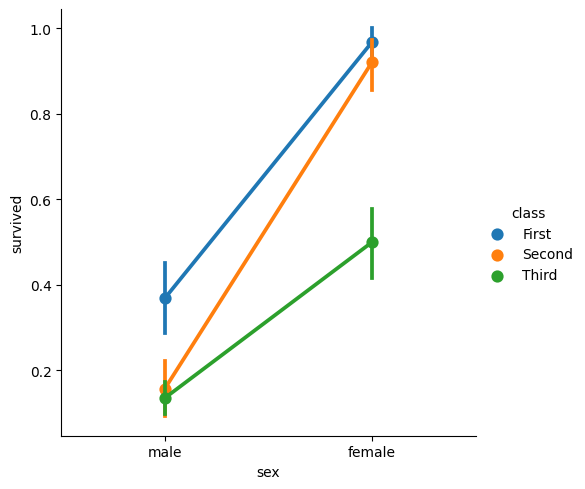

In [70]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

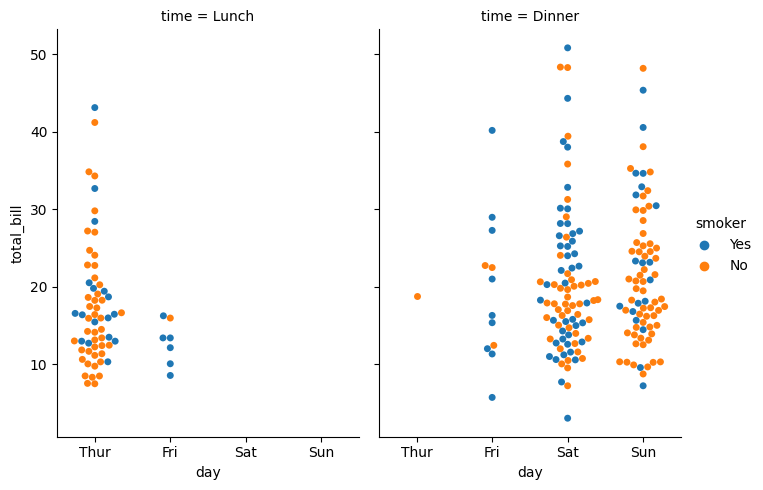

In [71]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)